In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Explore the data
df = pd.read_csv('covid_19_data.csv') 
df.head()

C:\Users\AENA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SrNo,ObvDate,Province,Country,LastUpdate,Confirmed,Deaths,Recovery
0,1.0,9/23/2020,Beijing,Mainland China,9/24/2020 4:23,935.0,9.0,926.0
1,2.0,9/23/2020,Belgorod Oblast,Russia,9/24/2020 4:23,8422.0,57.0,7643.0
2,3.0,9/23/2020,Berlin,Germany,9/24/2020 4:23,13572.0,228.0,11935.0
3,4.0,9/23/2020,Bermuda,UK,9/24/2020 4:23,181.0,9.0,167.0
4,5.0,9/23/2020,Bihar,India,9/24/2020 4:23,171255.0,873.0,157454.0


In [ ]:
# Checking any missing(NaN) values is present
df.isnull().sum()

SrNo          116286
ObvDate       116286
Province      116286
Country       116286
LastUpdate    116286
Confirmed     116286
Deaths        116286
Recovery      116286
dtype: int64

In [ ]:
data = df.dropna(axis='rows')

In [ ]:
data.head()

,SrNo,ObvDate,Province,Country,LastUpdate,Confirmed,Deaths,Recovery
0,1.0,9/23/2020,Beijing,Mainland China,9/24/2020 4:23,935.0,9.0,926.0
1,2.0,9/23/2020,Belgorod Oblast,Russia,9/24/2020 4:23,8422.0,57.0,7643.0
2,3.0,9/23/2020,Berlin,Germany,9/24/2020 4:23,13572.0,228.0,11935.0
3,4.0,9/23/2020,Bermuda,UK,9/24/2020 4:23,181.0,9.0,167.0
4,5.0,9/23/2020,Bihar,India,9/24/2020 4:23,171255.0,873.0,157454.0


In [ ]:
# Checking any missing(NaN) values is present
data.isnull().sum()

SrNo          0
ObvDate       0
Province      0
Country       0
LastUpdate    0
Confirmed     0
Deaths        0
Recovery      0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

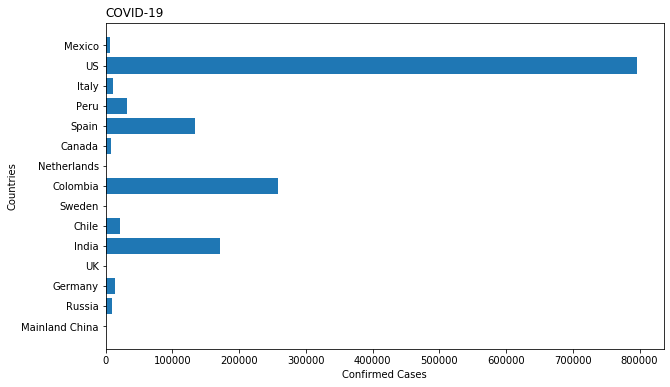

In [ ]:
Country = data['Country'].head(32) 
Confirmed = data['Confirmed'].head(32)
  
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 6)) 
  
# Horizontal Bar Plot 
ax.barh(Country, Confirmed) 

# Add Plot Title 
ax.set_title('COVID-19', 
             loc ='left', )
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Countries')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

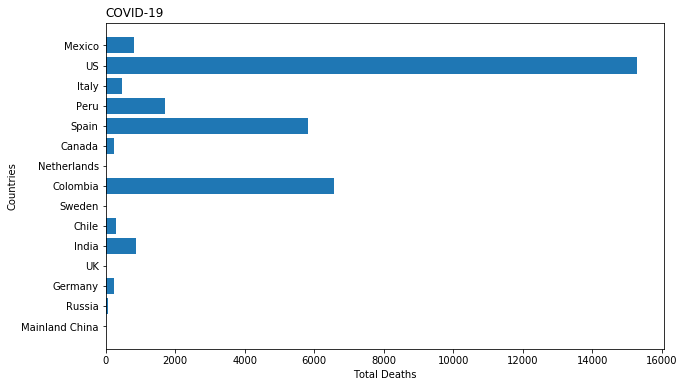

In [ ]:
Country = data['Country'].head(32) 
Deaths = data['Deaths'].head(32)
  
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 6)) 
  
# Horizontal Bar Plot 
ax.barh(Country, Deaths) 

# Add Plot Title 
ax.set_title('COVID-19', 
             loc ='left', )
ax.set_xlabel('Total Deaths')
ax.set_ylabel('Countries')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

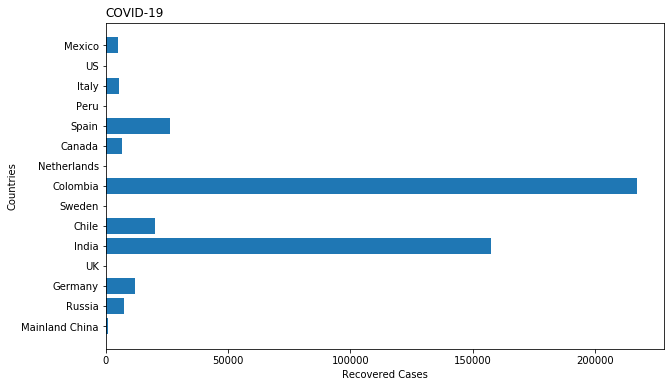

In [ ]:
Country = data['Country'].head(32) 
Recovery = df['Recovery'].head(32)
  
# Figure Size 
fig, ax = plt.subplots(figsize =(10, 6)) 
  
# Horizontal Bar Plot 
ax.barh(Country, Recovery) 

# Add Plot Title 
ax.set_title('COVID-19', 
             loc ='left', )
ax.set_xlabel('Recovered Cases')
ax.set_ylabel('Countries')

plt.show

In [ ]:
df_group = df[['Country','Confirmed','Deaths','Recovery']]
df_group.groupby(['Country']).mean()

,Confirmed,Deaths,Recovery
Country,,,
Australia,3838.142857,122.571429,3476.571429
Brazil,181885.590909,5654.727273,159430.090909
Canada,10223.615385,694.923077,8815.230769
Chile,34080.166667,962.833333,32232.750000
Colombia,20193.900000,642.933333,16824.166667
Denmark,232.500000,0.000000,215.000000
France,2450.000000,19.500000,1874.100000
Germany,11017.866667,326.333333,9706.866667
Hong Kong,5049.000000,104.000000,4749.000000


In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [ ]:
Clus_dataSet = data[['Confirmed','Deaths','Recovery']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
#they might behave badly if the individual features do not more or less look like standard normally distributed data:
#
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)
print(Clus_dataSet)


[[-0.36372027 -0.3510021  -0.18897506]
 [-0.29551007 -0.33835802 -0.14089554]
 [-0.24859108 -0.29331345 -0.11017389]
 ...
 [-0.36055894 -0.35310945 -0.18649843]
 [-0.32494605 -0.32913837 -0.17518181]
 [-0.10336083  0.0080373  -0.19560326]]


In [ ]:
db = DBSCAN(eps=0.3, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#print(labels)
data['Clus_Db']=labels
#print(core_samples_mask)

C:\Users\AENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
#print(realClusterNum)

In [ ]:
# A sample of clusters
print(data[['Confirmed','Deaths','Recovery','Clus_Db']].head())

   Confirmed  Deaths  Recovery  Clus_Db
0      935.0     9.0     926.0        0
1     8422.0    57.0    7643.0        0
2    13572.0   228.0   11935.0        0
3      181.0     9.0     167.0        0
4   171255.0   873.0  157454.0        1


In [ ]:
# number of labels
print("number of labels: ", set(labels))

number of labels:  {0, 1, 2, 3, 4, 5, 6, -1}


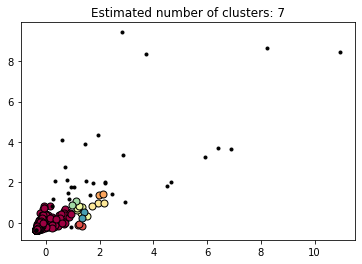

number of noise(s):  32


In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [ ]:
for clust_number in set(labels):
    clust_set = data[data.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Confirmed: '+ str(round(np.mean(clust_set.Confirmed)))+\
               ', Avg Deaths: '+ str(round(np.mean(clust_set['Deaths'])))+\
               ', Avg Recovered: '+ str(round(np.mean(clust_set['Recovery'])))+', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Confirmed: 15589, Avg Deaths: 511, Avg Recovered: 8016, Count: 469
Cluster 1, Avg Confirmed: 178879, Avg Deaths: 885, Avg Recovered: 152267, Count: 3
Cluster 2, Avg Confirmed: 265456, Avg Deaths: 6666, Avg Recovered: 229812, Count: 2
Cluster 3, Avg Confirmed: 254639, Avg Deaths: 4878, Avg Recovered: 219594, Count: 3
Cluster 4, Avg Confirmed: 182439, Avg Deaths: 3727, Avg Recovered: 166056, Count: 6
Cluster 5, Avg Confirmed: 154699, Avg Deaths: 5047, Avg Recovered: 0, Count: 2
Cluster 6, Avg Confirmed: 191649, Avg Deaths: 2796, Avg Recovered: 0, Count: 2
